# **Introduction**

This dataset consists of the student's performance in exams such as math, reading and writing. There are notable features that might influence the score of the students such as the Parent's Level of Education, their daily lunch and if they have completed the preperation test. The students here are also grouped by race/ethnicity.

In [1]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 200)

Matplotlib is building the font cache; this may take a moment.


OptionError: 'Pattern matched multiple keys'

In [3]:
#Importing File

df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

# **Data Cleaning & Preparation**

Before making an analysis, it is wise to clean the data as well as organize the data to be used for deeper analysis later on. My data cleaning methods include:

1. Checking for Missing Values in Each Column
2. Renaming the Name of the Columns
3. Checking for Duplicate Values between each Row
4. Removing unnecessary words from the some column
5. Fixing Capitalizations
6. Creating Categories with Hierarchy
7. Creating Identifier column

In [4]:
# First few rows of the dataset

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Checking the column names

df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
#Checking for missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# Renaming Columns for ease of use 

df = df.rename(columns = {'race/ethnicity' : 'race',
                    'parental level of education' : 'parentalLOE',
                    'test preparation course' : 'test_prep',
                    'math score': 'math_score',
                    'reading score' : 'reading_score',
                    'writing score': 'writing_score'})
print(df)

     gender     race         parentalLOE         lunch  test_prep  math_score  \
0    female  group B   bachelor's degree      standard       none          72   
1    female  group C        some college      standard  completed          69   
2    female  group B     master's degree      standard       none          90   
3      male  group A  associate's degree  free/reduced       none          47   
4      male  group C        some college      standard       none          76   
..      ...      ...                 ...           ...        ...         ...   
995  female  group E     master's degree      standard  completed          88   
996    male  group C         high school  free/reduced       none          62   
997  female  group C         high school  free/reduced  completed          59   
998  female  group D        some college      standard  completed          68   
999  female  group D        some college  free/reduced       none          77   

     reading_score  writing

In [8]:
#Checking Duplicates

duplicates = df.duplicated()
df[duplicates]

,gender,race,parentalLOE,lunch,test_prep,math_score,reading_score,writing_score


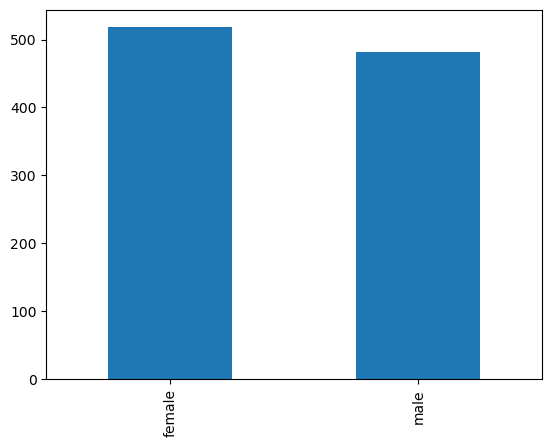

In [9]:
#Checking 'gender' Column
df['gender'].value_counts().plot(kind='bar')
plt.show()

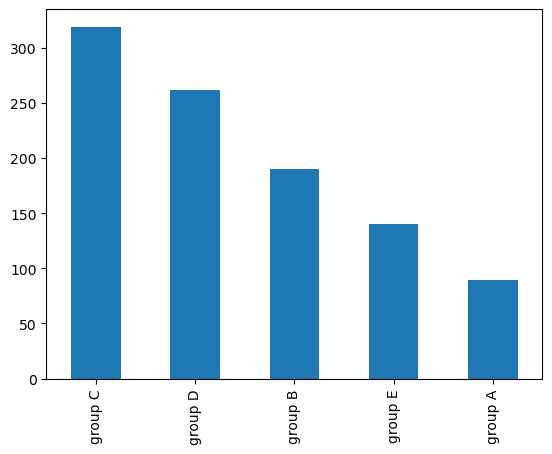

In [10]:
#Checking 'race' Column

df['race'].value_counts().plot(kind='bar')
plt.show()

In [11]:
#Removing the word 'group' from the 'race' column for easier classification

df['race'] = df['race'].str.replace('group', '')

#Checking if changes has been made
df['race']

0       B
1       C
2       B
3       A
4       C
       ..
995     E
996     C
997     C
998     D
999     D
Name: race, Length: 1000, dtype: object

In [12]:
# Changing race and parentalLOE column into category data type

df['race'] = df['race'].astype('category')

df['parentalLOE'] = df['parentalLOE'].astype('category')

#Checking if changes has been made
df.dtypes

gender             object
race             category
parentalLOE      category
lunch              object
test_prep          object
math_score          int64
reading_score       int64
writing_score       int64
dtype: object

In [13]:
#Capitalizing the first word in the 'parentalLOE' column

df['parentalLOE'] = df['parentalLOE'].str.title()

df['parentalLOE']

0       Bachelor'S Degree
1            Some College
2         Master'S Degree
3      Associate'S Degree
4            Some College
              ...        
995       Master'S Degree
996           High School
997           High School
998          Some College
999          Some College
Name: parentalLOE, Length: 1000, dtype: object

In [14]:
# Cleaning up the parentalLOE column by giving it order according to the level of education of the parents

level_ordered = ["Some High School", "High School", "Some College", "Associate'S Degree", "Bachelor'S Degree", "Master'S Degree" ]

df['parentalLOE'] = df['parentalLOE'].astype('category')

df["parentalLOE"] = df["parentalLOE"].cat.set_categories(level_ordered, ordered=True)


#Checking if changes has been made
df['parentalLOE'].unique().sort_values()

['Some High School', 'High School', 'Some College', 'Associate'S Degree', 'Bachelor'S Degree', 'Master'S Degree']
Categories (6, object): ['Some High School' < 'High School' < 'Some College' < 'Associate'S Degree' < 'Bachelor'S Degree' < 'Master'S Degree']

Since there are is identifier column, I made the index as a column to identify each student as a number.

In [15]:
#Making index as a column for identification

df.reset_index(inplace=True)

In [16]:
#Renaming the 'index' column to 'id'
df = df.rename(columns = {'index' : 'id'})

#Checking if changes has been made
print(df)

      id  gender race         parentalLOE         lunch  test_prep  \
0      0  female    B   Bachelor'S Degree      standard       none   
1      1  female    C        Some College      standard  completed   
2      2  female    B     Master'S Degree      standard       none   
3      3    male    A  Associate'S Degree  free/reduced       none   
4      4    male    C        Some College      standard       none   
..   ...     ...  ...                 ...           ...        ...   
995  995  female    E     Master'S Degree      standard  completed   
996  996    male    C         High School  free/reduced       none   
997  997  female    C         High School  free/reduced  completed   
998  998  female    D        Some College      standard  completed   
999  999  female    D        Some College  free/reduced       none   

     math_score  reading_score  writing_score  
0            72             72             74  
1            69             90             88  
2            90

I created a new column called 'id' as identifier column that acts as the student id. 

# **Data Exploration**

In this stage, I will visualize the data to get a bigger picture of the information it is trying to give. I will also give my thoughts and explanation about the insights that I have found within the data.

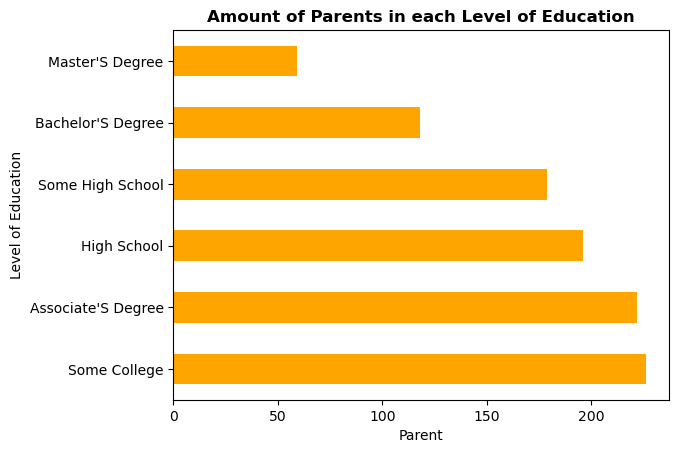

In [17]:
#Checking and understanding 'parentalLOE' column

df['parentalLOE'].value_counts().plot(kind='barh', color='orange')

plt.xlabel('Parent')
plt.ylabel('Level of Education')
plt.title('Amount of Parents in each Level of Education', weight='bold')
plt.show()


**Clear Understanding of Education Level**

A clear understanding of the differences between degrees will help us analyze the data. Below is a brief summary that can help us make the distinction:

1. *Associate Degree*   : Full-time associate's degree will take 2 years to complete
2. *Bachelor's Degree*  : Full-time bachelor's degree will take 4 years to complete
3. *Master's Degree*    : A master’s degree is an advanced graduate degree that can be pursued after you have completed a  bachelor’s degree.
 

It is also important to understand the differences between College and University. These two words are used interchangeably, but there is a distinction between the two. Here is a short summary about the differences between the two:

Colleges, compared to universites, tend to be smaller institution that focuses on undergraduate programs. Often, colleges offer liberal arts programs with broad areas of study in subjects like the humanities, science, and creative arts The Universities offer both undergraduate and graduate programs.

Sources:
https://www.northeastern.edu/bachelors-completion/news/associates-degree-vs-bachelors-degree/

https://www.phoenix.edu/blog/difference-between-bachelor-and-master-degree.html

If we look at the parentalLOE column, we find 2 categories which are some high school and some college. Since there are no explanations about the definition of these two terms, I am going to infer that 'some high school' means a parent who went to high school and but did not finish their education. Same goes as 'some college', meaning that a parent who went to college but did not finish their education

From the graph above, we can see that a lot of the parents attended college but did not finish, Therefore, they can't be categorized as having a degree. 

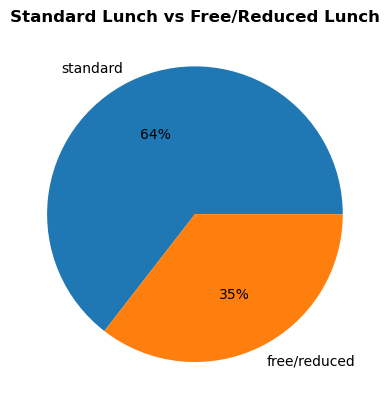

In [18]:
#Checking 'lunch' column

df['lunch'].value_counts().plot.pie(autopct='%1.0f%%')

plt.title('Standard Lunch vs Free/Reduced Lunch', weight='bold')
plt.ylabel('')
plt.show()

**Clear Understanding of Lunch Terminology**

1. *Standard* : A student who has to pay full price for their lunch
2. *Free/reduced* : A student who pays a reduce amount for their lunch or recieves their lunch for free

From the graph above, the 64% of students need to pay standard pricing for their lunches and only 35% paid a reduced price or gets free lunch.

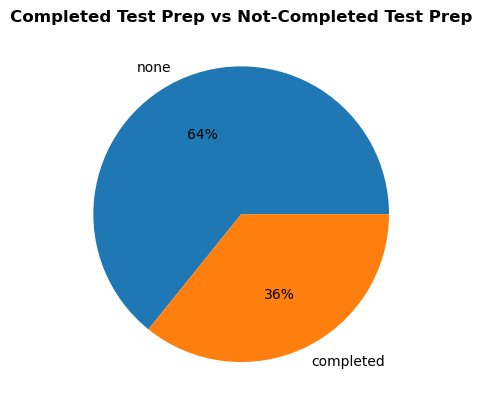

In [19]:
#Exploring test_prep column

df['test_prep'].value_counts().plot.pie(autopct='%1.0f%%')

plt.title('Completed Test Prep vs Not-Completed Test Prep', weight='bold')
plt.ylabel('')
plt.show()

From the pie chart above, we can see that 64% of the students did not complete their test preperation and only 36% students did complete their test preperations.

## The Overall Student's Performance In Each Subject

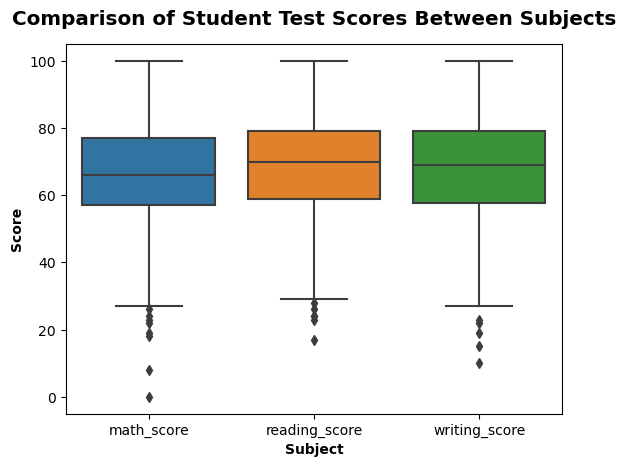

In [20]:
# Looking at the test scores between subjects

test_score = df[['math_score', 'reading_score', 'writing_score']]

test_plot = sns.boxplot(data=test_score)

test_plot.set_title('Comparison of Student Test Scores Between Subjects', y=1.03,
                   fontweight='heavy', size='x-large')

test_plot.set_xlabel('Subject', fontweight='bold')
test_plot.set_ylabel('Score', fontweight='bold')

plt.show()

By the box plot above, we can conclude that most of the students achieve a slightly higher score in reading compared to writing and math. There are students who has noticeably low scores on Math reaching below the score of 20.

In [21]:
#Specific details regarding the plot

df.describe()

,id,math_score,reading_score,writing_score
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,66.08900,69.169000,68.054000
std,288.819436,15.16308,14.600192,15.195657
min,0.000000,0.00000,17.000000,10.000000
25%,249.750000,57.00000,59.000000,57.750000
50%,499.500000,66.00000,70.000000,69.000000
75%,749.250000,77.00000,79.000000,79.000000
max,999.000000,100.00000,100.000000,100.000000


## The Distribution of Student's Test Scores For Each Subject

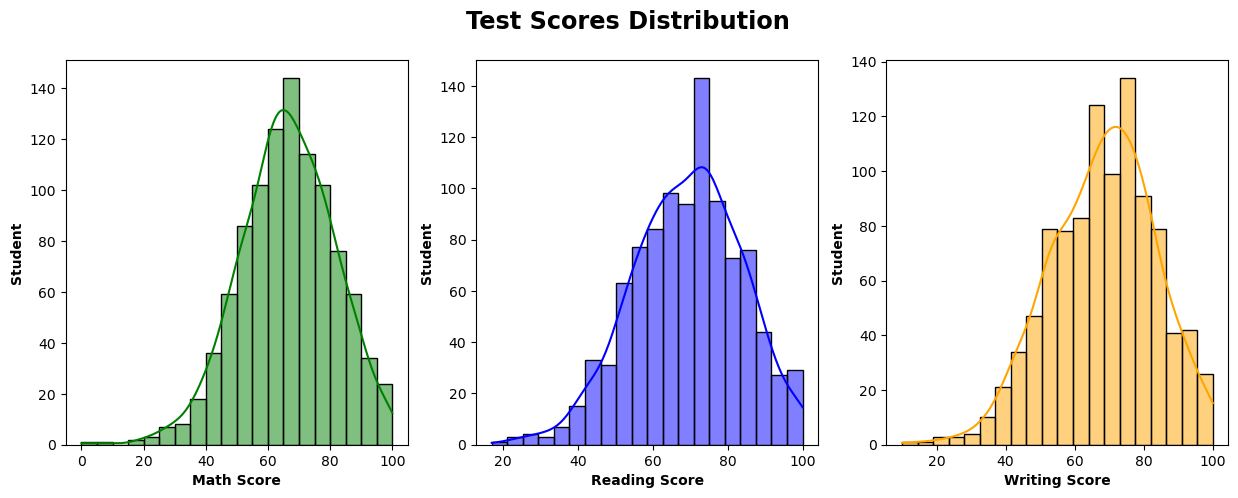

In [22]:
# Plotting the distribution of all the test scores.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 
fig.suptitle('Test Scores Distribution', fontweight='heavy', size='xx-large')


math_hist = sns.histplot(ax=axes[0], data=df, x='math_score', bins = 20, kde=True, color='green')
reading_hist = sns.histplot(ax=axes[1], data=df, x='reading_score', bins = 20, kde=True, color='blue')
writing_hist = sns.histplot(ax=axes[2], data=df, x='writing_score', bins = 20, kde=True, color='orange')

math_hist.set_xlabel('Math Score', fontweight='bold')
math_hist.set_ylabel('Student', fontweight='bold')

reading_hist.set_xlabel('Reading Score', fontweight='bold')
reading_hist.set_ylabel('Student', fontweight='bold')

writing_hist.set_xlabel('Writing Score', fontweight='bold')
writing_hist.set_ylabel('Student', fontweight='bold')

plt.show()

The histograms above shows that the data is slightly left-skewed. Therefore the use of median is better due to the average score being affected by extreme values or outliers.

## The Distribution of Race/Group among Students

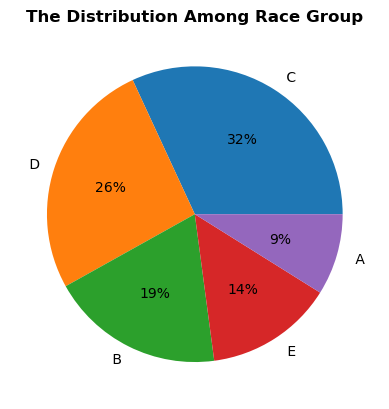

In [23]:
#The distribution among Race

df['race'].value_counts().plot.pie(autopct='%1.0f%%')

plt.title('The Distribution Among Race Group', weight='bold')
plt.ylabel('')

plt.show()

The students in each race/ethnicity is not evenly representated. Group A is very under representated compared to other race/ethnicity. If for example, a few students produced in group A produce really, high scores and really low scores, the spread of the scores within the group would be quite wide.

## Student's Performance Compared By Each Race/Group

Text(0.5, 1.0, 'Math Score Comparison Between Race/Groups')

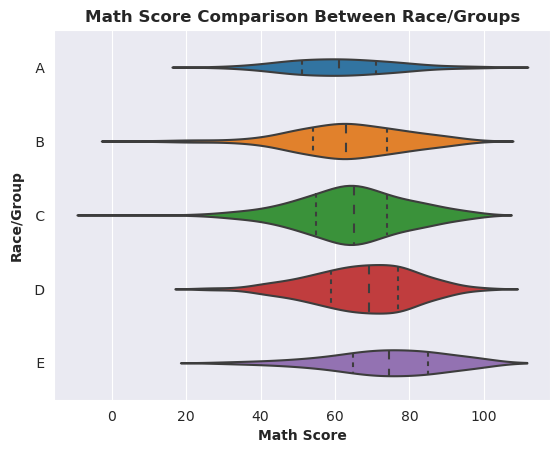

In [24]:
#Distinction in Math scores between groups 
sns.set_style("darkgrid")

math_violin = sns.violinplot(data=df, x='math_score', y='race', inner='quartile', scale='count')

math_violin.set_xlabel('Math Score', fontweight='bold')
math_violin.set_ylabel('Race/Group', fontweight='bold')
math_violin.set_title('Math Score Comparison Between Race/Groups', fontweight='heavy')

**Group E performs better in Math**. Interestingly, **Group C students produce one of the lowest scores in Math**. This means that from the 'Comparison of Student Test Scores Between Subjects' boxplot, we can conclude that the students who achieve low scores in Math are from Group C.


Text(0.5, 1.0, 'Reading Score Comparison Between Race/Groups')

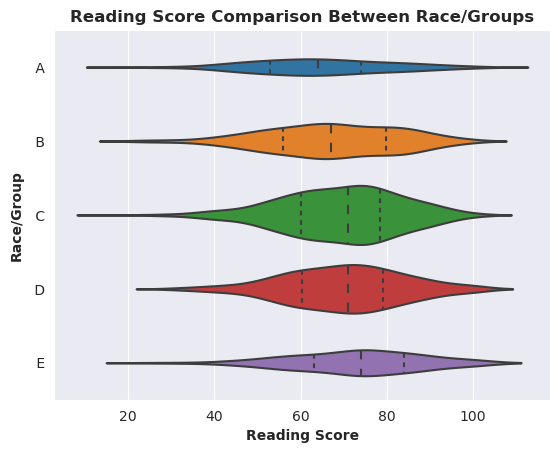

In [25]:
#Distinction in Reading scores between groups 
sns.set_style("darkgrid")

reading_violin = sns.violinplot(data=df, x='reading_score', y='race', inner='quartile', scale='count')

reading_violin.set_xlabel('Reading Score', fontweight='bold')
reading_violin.set_ylabel('Race/Group', fontweight='bold')
reading_violin.set_title('Reading Score Comparison Between Race/Groups', fontweight='heavy')

Almost all groups perform the same on the Reading Subject with group A falling a little bit behind than the other groups. We can see that **some students from each group scored lower than 20 except from students who are in group D** which not even one student scored below 20 for Reading.

Text(0.5, 1.0, 'Reading Score Comparison Between Race/Groups')

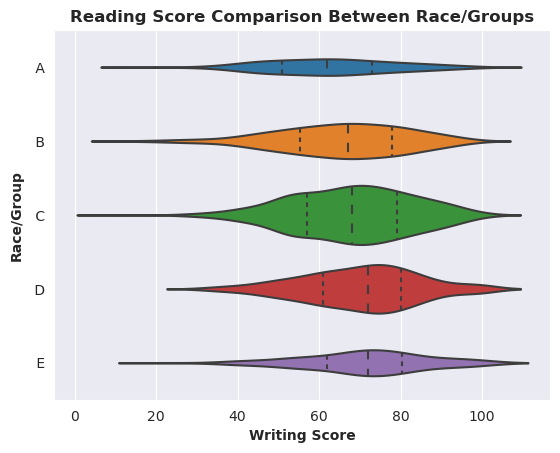

In [26]:
#Distinction in Writing scores between groups 
sns.set_style("darkgrid")

writing_violin = sns.violinplot(data=df, x='writing_score', y='race', inner='quartile', scale='count')

writing_violin.set_xlabel('Writing Score', fontweight='bold')
writing_violin.set_ylabel('Race/Group', fontweight='bold')
writing_violin.set_title('Reading Score Comparison Between Race/Groups', fontweight='heavy')

Group E performs the best in the writing. However, it is not significantly ahead of other groups.

From the 3 violin plots above, we can conclude that **group E performs the better amongst the other groups**. This might be due the amount of student in group E which is only 14 percent from the overall students. **Group A performs the worst in all subjects even though the amount of students in that group compared to overall is only 9 percent**. We can infer that the amount of students in each race/group does not really affect the overall group performance.

However interestingly to note, since **group C** has the largest amount of students (32%), they are the group **to produce the largest amount of low scores (<40) in all subjects**. 

## The Effect of Parental Level Of Education in Student's Performance

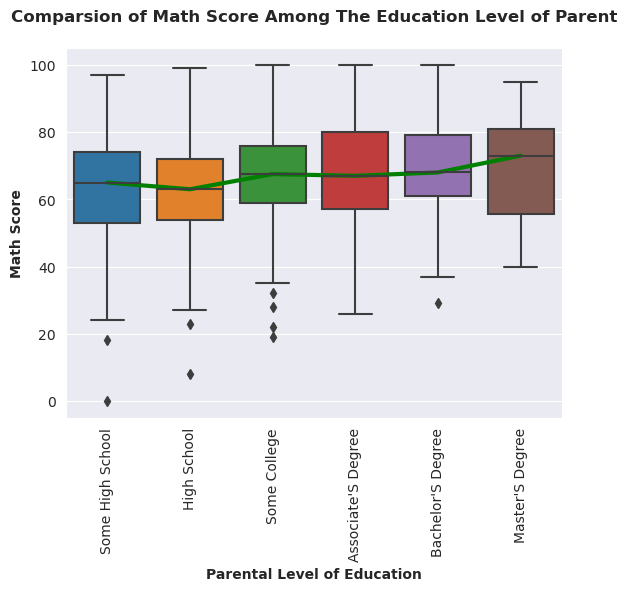

In [27]:
parental_order = ["Some High School", "High School", "Some College", "Associate'S Degree", "Bachelor'S Degree", "Master'S Degree" ]

math_score_median = df.groupby('parentalLOE')['math_score'].median()

parental_math = sns.boxplot(data=df, x='parentalLOE', y='math_score', order=parental_order)
parental_math = sns.lineplot(data=math_score_median, color='green', linewidth = 3)

parental_math.set_xlabel('Parental Level of Education', fontweight='bold')
parental_math.set_ylabel('Math Score', fontweight='bold')
parental_math.set_title('Comparsion of Math Score Among The Education Level of Parent', fontweight='heavy', y= 1.05)

plt.xticks(rotation=90)

plt.show()

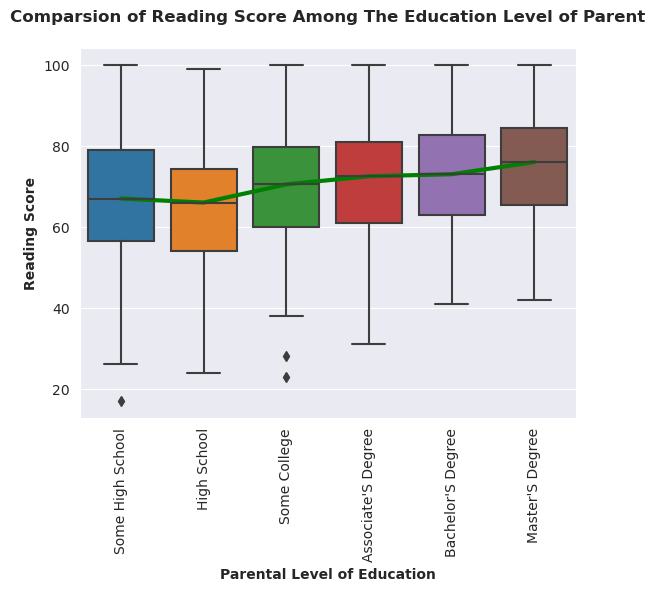

In [28]:
parental_order = ["Some High School", "High School", "Some College", "Associate'S Degree", "Bachelor'S Degree", "Master'S Degree" ]

reading_score_median = df.groupby('parentalLOE')['reading_score'].median()

parental_reading = sns.boxplot(data=df, x='parentalLOE', y='reading_score', order=parental_order)
parental_reading = sns.lineplot(data=reading_score_median, color='green', linewidth = 3)

parental_reading.set_xlabel('Parental Level of Education', fontweight='bold')
parental_reading.set_ylabel('Reading Score', fontweight='bold')
parental_reading.set_title('Comparsion of Reading Score Among The Education Level of Parent', fontweight='heavy', y= 1.05)

plt.xticks(rotation=90)

plt.show()

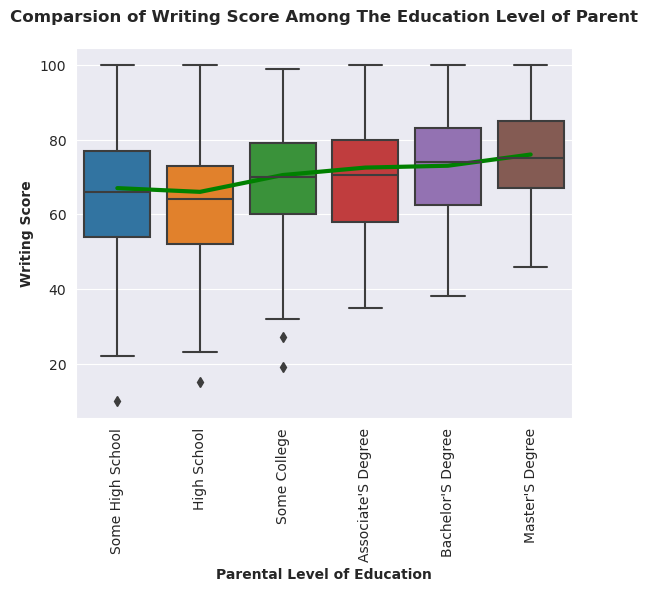

In [29]:
parental_order = ["Some High School", "High School", "Some College", "Associate'S Degree", "Bachelor'S Degree", "Master'S Degree" ]

writing_score_median = df.groupby('parentalLOE')['writing_score'].median()

parental_writing = sns.boxplot(data=df, x='parentalLOE', y='writing_score', order=parental_order)
parental_writing = sns.lineplot(data=reading_score_median, color='green', linewidth = 3)

parental_writing.set_xlabel('Parental Level of Education', fontweight='bold')
parental_writing.set_ylabel('Writing Score', fontweight='bold')
parental_writing.set_title('Comparsion of Writing Score Among The Education Level of Parent', fontweight='heavy', y= 1.05)

plt.xticks(rotation=90)

plt.show()

**Parental level of education affects the student's performance in the test**. The higher the academic level of the parents, the higher the score. However, there's slight drop from parents who didn't finish high school and parents who did. Surprisingly, **the students whose parents dropped out of High school scored higher than students whose parents finished high school. However, it is not significantly different.**

## The Effect of Taking Preperation Test in Student's Performance

In [30]:
#Changing the dataframe from wide to long data format

dflongdata = df[['id', 'test_prep', 'math_score', 'reading_score', 'writing_score']]

dflong = pd.melt(dflongdata, id_vars=('id', 'test_prep'), value_vars=('math_score', 'reading_score', 'writing_score'), var_name='test_subject', value_name='score')

dflong

,id,test_prep,test_subject,score
0,0,none,math_score,72
1,1,completed,math_score,69
2,2,none,math_score,90
3,3,none,math_score,47
4,4,none,math_score,76
...,...,...,...,...
2995,995,completed,writing_score,95
2996,996,none,writing_score,55
2997,997,completed,writing_score,65
2998,998,completed,writing_score,77


In [31]:
#Tidying up the test_subject column

dflong['test_subject'] = dflong['test_subject'].str.replace('_score','')

dflong['test_subject'] = dflong['test_subject'].str.title()

dflong['test_subject']

0          Math
1          Math
2          Math
3          Math
4          Math
         ...   
2995    Writing
2996    Writing
2997    Writing
2998    Writing
2999    Writing
Name: test_subject, Length: 3000, dtype: object

In [32]:
# Summarizing the data for later visualization

dflong_median = dflong.groupby(['test_subject', 'test_prep'], as_index = False)['score'].median()
dflong_median

,test_subject,test_prep,score
0,Math,completed,69.0
1,Math,none,64.0
2,Reading,completed,75.0
3,Reading,none,67.0
4,Writing,completed,76.0
5,Writing,none,65.0


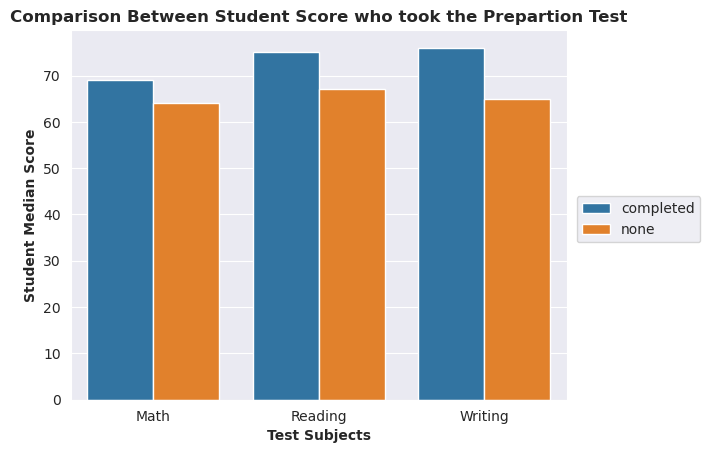

In [33]:
#Plotting the difference between students who completed the test_prep vs students who did not

test_prep_plot = sns.barplot(data=dflong_median, x='test_subject', y='score', hue='test_prep', errorbar=None)

test_prep_plot.set_xlabel('Test Subjects', fontweight='bold')
test_prep_plot.set_ylabel('Student Median Score', fontweight='bold')
test_prep_plot.set_title('Comparison Between Student Score who took the Prepartion Test', fontweight='heavy')

plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

plt.show()

To prevent outliers from affecting the mean, I choose to use median to compare the score. We can see from the graph above that **there is a significant difference of scores between the students who completed the preperation test**, and the student who did not. The student who did complete the preperation test, performed better in all subjects.

# **Hypothesis Testing**

Note that this dataset is a sample of score from 1000 students and not the population. 

**A. Math Scores Between Students Whose Parental Level of Education is Bachelor's and Master's Degree**

**Null Hypothesis** : The Math scores of the students whose parental level of education is Bachelor's Degree **is the same** as Master's Degree.

**Alternate Hypothesis** : The Math scores of the students whose parental level of education is Bachelor's Degree **is different** Master's Degree.

In [34]:
#Importing Scipytest

from scipy.stats import *

Since we are looking if there is a difference, we will be using a **Two Tailed Test**.

In [35]:
#Changing into data frame to long data for the calculation

dflongdata2 = df[['id', 'parentalLOE', 'math_score',]]

dflong2 = pd.melt(dflongdata2, id_vars=('parentalLOE'), value_vars=('math_score'), value_name='score')

dflong2

,parentalLOE,variable,score
0,Bachelor'S Degree,math_score,72
1,Some College,math_score,69
2,Master'S Degree,math_score,90
3,Associate'S Degree,math_score,47
4,Some College,math_score,76
...,...,...,...
995,Master'S Degree,math_score,88
996,High School,math_score,62
997,High School,math_score,59
998,Some College,math_score,68


In [36]:
#Dropping the Variable Column

dflong2.drop(columns='variable', inplace=True)

In [37]:
#Subsetting the data 

bachelor = dflong2[dflong2.parentalLOE == "Bachelor'S Degree"]
master = dflong2[dflong2.parentalLOE == "Master'S Degree"]

In [38]:
#Computing p_value
stat, p_value1 = ttest_ind(bachelor['score'], master['score'], equal_var=True)
p_value1

0.8819757824867702

In [39]:
#alpha Value is 0.05 or 5%
if p_value1 < 0.05:
    print('We Reject Null Hypothesis')
else:
    print('We accept Null Hypothesis')

We accept Null Hypothesis


Meaning that The Math scores of the students whose parental level of education is Bachelor's Degree **is the same as** the students whose parental level of education is Master's Degree.

**B. Math Scores Between Students Whose Parental Level of Education is Some High School and Master's Degree**

Null Hypothesis : The Math scores of the students whose parental level of education is Some High School **is the same** as Master's Degree.

Alternate Hypothesis : The Math scores of the students whose parental level of education is Some High School **is different** Master's Degree.

In [40]:
#Subsetting the Data

some_high_schoolsc = dflong2[dflong2.parentalLOE == "Some High School"]

In [41]:
#Computing p_value
stat, p_value2 = ttest_ind(some_high_schoolsc['score'], master['score'], equal_var=True)
p_value2

0.008736228790471057

In [42]:
#alpha Value is 0.05 or 5%
if p_value2 < 0.05:
    print('We Reject Null Hypothesis')
else:
    print('We accept Null Hypothesis')

We Reject Null Hypothesis


Meaning that The Math scores of the students whose parental level of education is Some High School **is different** than the students whose parental level of education is Master's Degree.

# **Multiple Linear Regression Model**

I am going to attempt to create a Multiple Linear Regression Model to predict the **writing score** of students. 

In [43]:
#Creating the variables of X and y

X = df[['parentalLOE','reading_score']]
y = df['writing_score']

The **Reading Score and Parental Level of Education** will be used as a predictor. From the Analysis above, we found out that the parental level of education has an effect on the student's score. The ParentalLOE column already has a hierarchy starting from "Some High School" to "Master's Degree".

In [44]:
#Transforming the parentalLOE column with Label Encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X['parentalLOE'] = labelencoder.fit_transform(X['parentalLOE'])

print(X)

     parentalLOE  reading_score
0              1             72
1              4             90
2              3             95
3              0             57
4              4             78
..           ...            ...
995            3             99
996            2             55
997            2             71
998            4             78
999            4             86

[1000 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [46]:
#Fitting Multiple Linear Reggression to the Training Set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
#Predictiing the Test Set Result

y_pred = regressor.predict(X_test)
y_pred

array([81.79216299, 47.71530749, 66.79410818, 48.79644241, 55.95806384,
       98.78995844, 66.71284359, 69.11890719, 70.87485406, 73.79320042,
       88.79125524, 64.11955559, 87.79138492, 73.11838848, 76.87407598,
       93.11579489, 54.95819352, 95.79034748, 62.7133623 , 88.11644329,
       67.11916655, 56.95793416, 82.87329791, 64.11955559, 44.95949031,
       66.87537277, 26.79929535, 65.95676705, 66.95663737, 50.1213711 ,
       58.9576748 , 88.70999064, 30.12396468, 65.71297326, 69.0376426 ,
       70.71232487, 60.12007431, 87.9539141 , 90.70973128, 41.12253821,
       59.79501593, 63.79449722, 49.71504813, 78.95508122, 60.95741544,
       75.11812912, 56.71414038, 67.11916655, 75.79294107, 77.03660517,
       85.11683233, 52.12111174, 62.7133623 , 50.95871223, 78.03647549,
       99.11501682, 57.79527529, 59.79501593, 59.79501593, 70.95611865,
       64.95689672, 68.79384882, 53.03971747, 48.95897159, 50.95871223,
       53.79579401, 61.71349198, 72.11851816, 35.71686364, 94.11

In [48]:
#Calculating the Coefficients

regressor.coef_

array([-0.08126459,  0.99987032])

In [49]:
#Calculating the Intercept

regressor.intercept_

-0.8720152596899879

In [50]:
#Calculating the R squared Value

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8969925323370517

Based on the R squared score of **0.90** proves that the the **linear Regression model is a good model**.

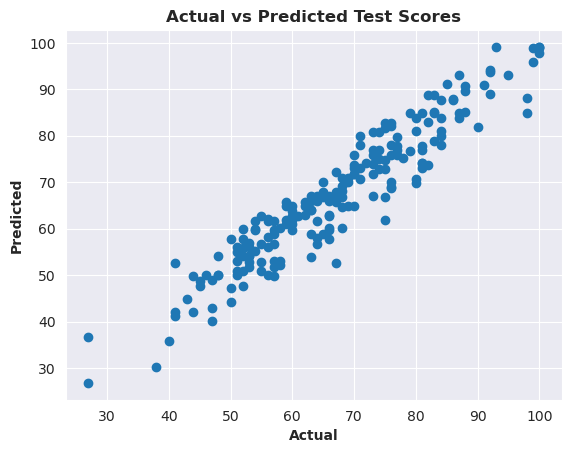

In [51]:
#Actual vs Predited Test Scores

plt.scatter(y_test, y_pred)
plt.xlabel('Actual', fontweight='bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.title('Actual vs Predicted Test Scores', fontweight='heavy')

plt.show()